In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

In [9]:
df = pd.read_excel("/content/Franchise_Dataset.xlsx")

In [10]:
df.head()

Net Profit  Counter Sales  Drive-through Sales Business Type
0         2.0            8.4                  7.7          Café
1         1.3            3.3                  4.5          Café
2         1.2            5.8                  8.4   Pizza Store
3         2.4           10.0                  7.8  Burger store
4         0.7            4.7                  2.4          Café

In [11]:
df.shape

(100, 4)

In [12]:
# See head of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Net Profit           100 non-null    float64
 1   Counter Sales        100 non-null    float64
 2   Drive-through Sales  100 non-null    float64
 3   Business Type        100 non-null    object 
dtypes: float64(3), object(1)
memory usage: 3.2+ KB


In [13]:

df.describe().T

count   mean       std  min    25%   50%    75%   max
Net Profit           100.0  1.451  0.590068  0.2  1.075  1.35  1.825   2.6
Counter Sales        100.0  6.523  2.014436  3.3  4.700  6.10  8.400  10.0
Drive-through Sales  100.0  4.762  2.282865  2.0  2.500  4.35  7.700   8.4

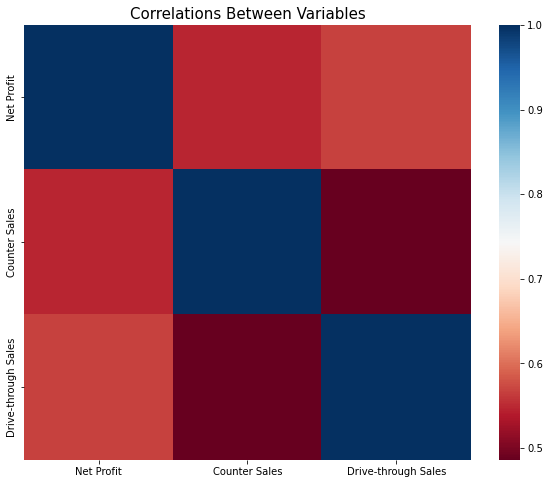

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [15]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
Net Profit             0
Counter Sales          0
Drive-through Sales    0
Business Type          0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


In [19]:
col=df.columns

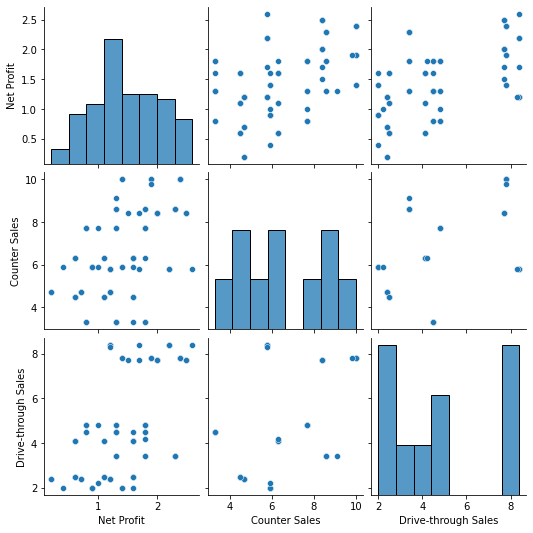

In [20]:
sns.pairplot(df[col])

In [21]:
X = df.drop("Net Profit", axis=1)
y = df["Net Profit"]

In [24]:
cat_cols = ["Business Type"]

In [25]:
X = pd.get_dummies(X, columns=cat_cols)

In [26]:
X

Counter Sales  Drive-through Sales  Business Type_Burger store  \
0             8.4                  7.7                           0   
1             3.3                  4.5                           0   
2             5.8                  8.4                           0   
3            10.0                  7.8                           1   
4             4.7                  2.4                           0   
..            ...                  ...                         ...   
95            7.7                  4.8                           1   
96            4.5                  2.5                           0   
97            9.1                  3.4                           0   
98            5.9                  2.2                           0   
99            6.3                  4.2                           1   

    Business Type_Café  Business Type_Pizza Store  
0                    1                          0  
1                    1                          0  
2                    0                          1  
3                    0                          0  
4                    1                          0  
..                 ...                        ...  
95                   0                          0  
96                   0                          1  
97                   0                          1  
98                   1                          0  
99                   0                          0  

[100 rows x 5 columns]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [30]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.16759775171838828
MSE: 0.03723823124553162
RMSE: 0.19297209965570572
R2 Score: 0.8934833202358935
------------------------------
RMSE Cross-Validation: 0.2160446388364435


In [32]:
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.0819585356710841
MSE: 0.007790357646819434
RMSE: 0.08826300270679349
R2 Score: 0.9777163682871297
------------------------------
RMSE Cross-Validation: 0.1282796864733308


In [33]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.06327047619047535
MSE: 0.009755219163265296
RMSE: 0.09876851301535979
R2 Score: 0.9720960550249849
------------------------------
RMSE Cross-Validation: 0.09830423517042755


In [34]:
models.sort_values(by="RMSE (Cross-Validation)")

Model       MAE       MSE      RMSE  R2 Score  \
2  RandomForestRegressor  0.063270  0.009755  0.098769  0.972096   
1                    SVR  0.081959  0.007790  0.088263  0.977716   
0       LinearRegression  0.167598  0.037238  0.192972  0.893483   

   RMSE (Cross-Validation)  
2                 0.098304  
1                 0.128280  
0                 0.216045

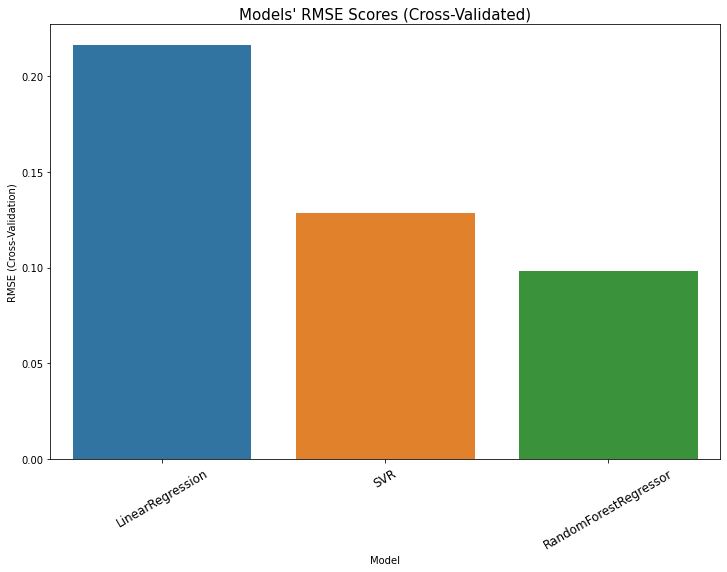

In [35]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

What is the forecast of the net profit, if the counter sales are 500,000 $, drive-through sales are 700,000$, and the franchise is a pizza store. Comment on the forecasted value.

In [58]:
df_test = pd.read_excel("/content/Test_Dataset.xlsx")

In [59]:
X_data_1=df_test[0:2]
print(df_test)

   Counter Sales  Drive-through Sales   Business Type_Burger store  \
0              5                    7                            0   

   Business Type_Café  Business Type_Pizza Store   
0                   0                           1  


In [60]:
predictions = random_forest.predict(X_data_1)

In [61]:
predictions

array([1.183])

In [62]:
predictions = svr.predict(X_data_1)

In [63]:
predictions

array([-0.37333012])

In [64]:
predictions = lin_reg.predict(X_data_1)
predictions

array([1.00627589])